## Cluster Evaluation - Silhouette Coefficient 
- Useful when working in higher dimensions and clustering visualizations are not available.
- For every point, $P_1$, in cluster $C_1$, compute its Silhouette Coefficient:
    - $a_1$ = average distance from $P_1$ to each point in $C_1$
    - $d_n$ = average distance from $P_1$ to each point in each remaining cluster, $C_n$
    - $b_1$ = min($d_1, d_2, …, d_n$)
    - $SilCoef_1 = \frac{(b_1 - a_1)}{max(a_1,b_1)}$
 
- $ \boldsymbol{Silhouette\ Coefficient = \frac{1}{n}\sum_1^n{SilCoef_n}} $
- Interpretation:
    - 1: Clusters are well apart from each other and clearly distinguished.
    - 0: Clusters are indifferent, or we can say that the distance between clusters is not significant.
    -  -1: Clusters are assigned in the wrong way.

In [11]:
# Import packages and functions
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

In [12]:
#optimal number of clusters is the CENTER, therefore it will be 6
X,y = make_blobs(n_samples = 2000, n_features = 2, centers = 6, cluster_std = .7, random_state=101)

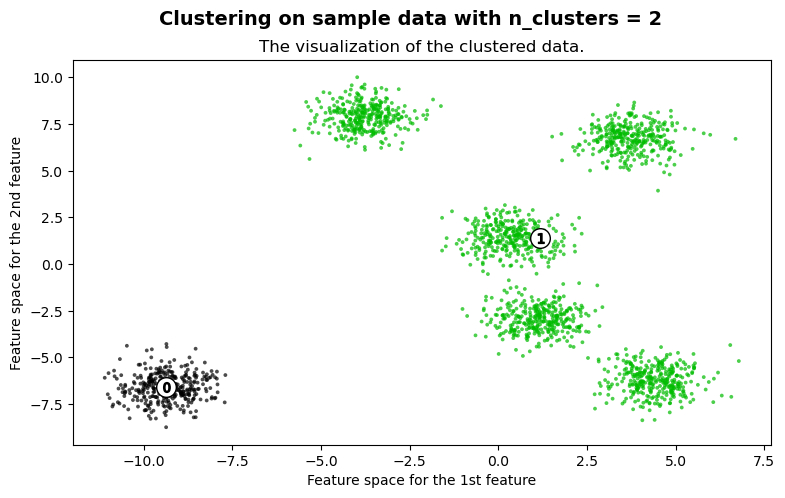

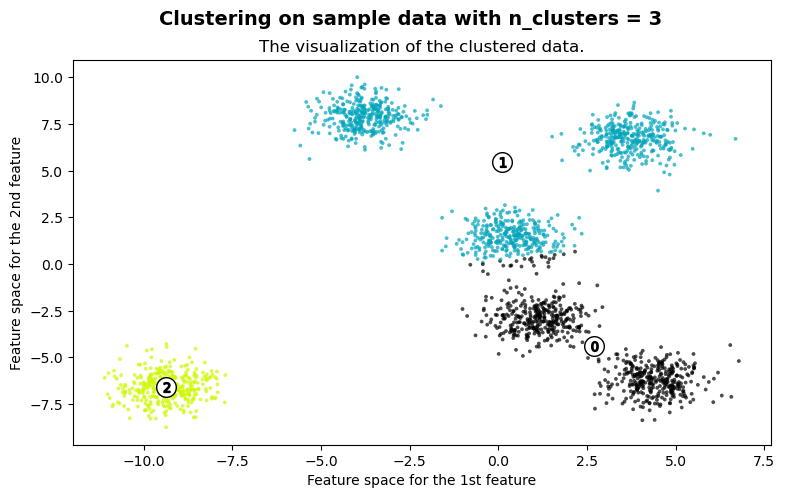

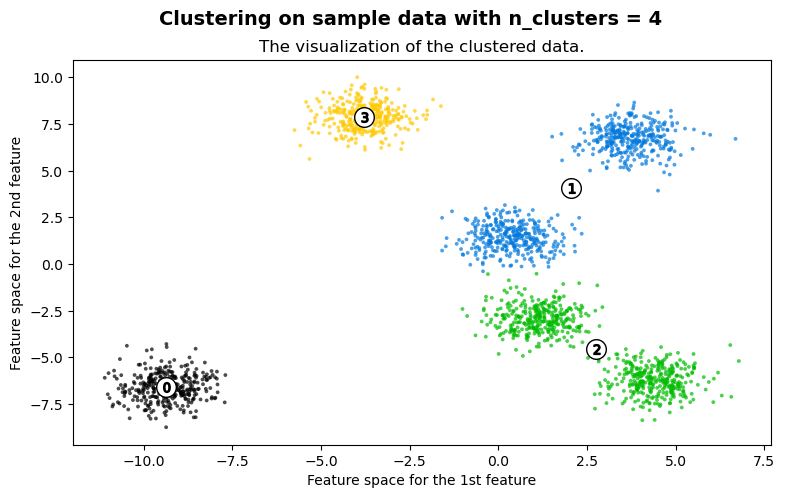

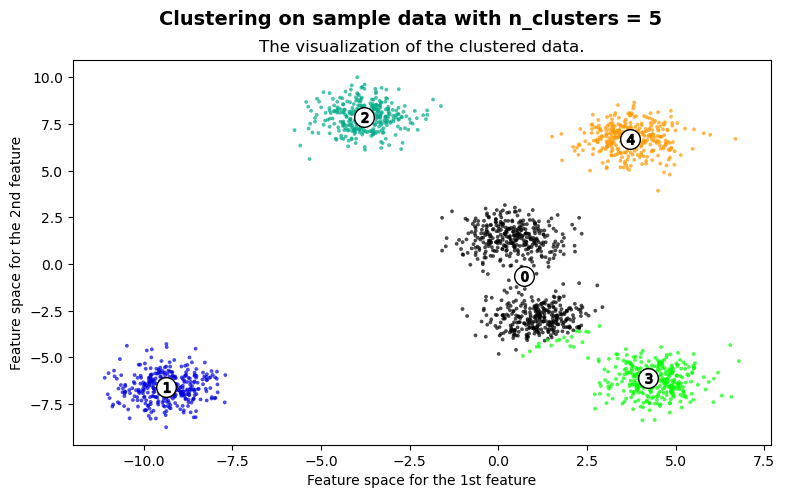

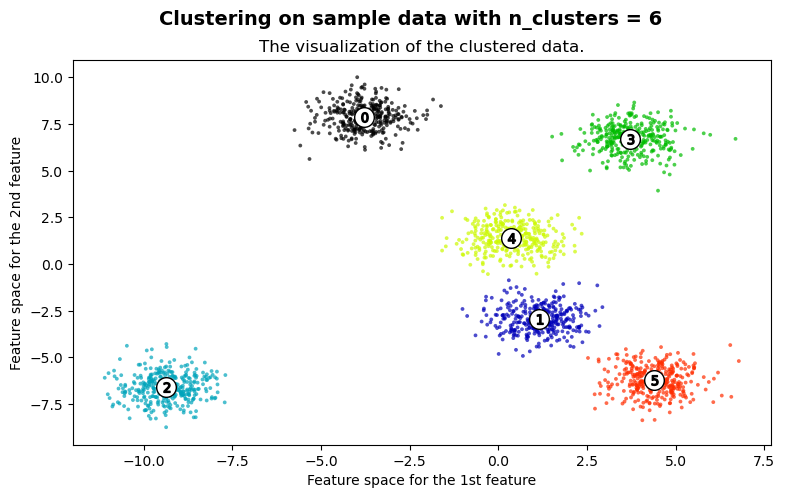

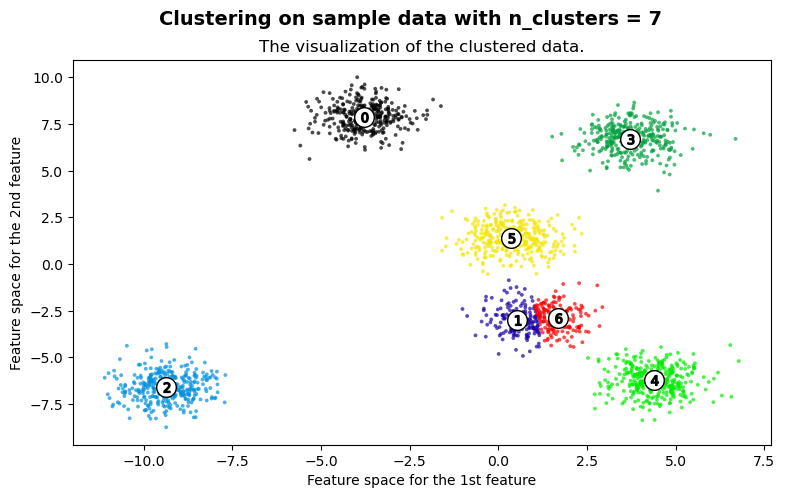

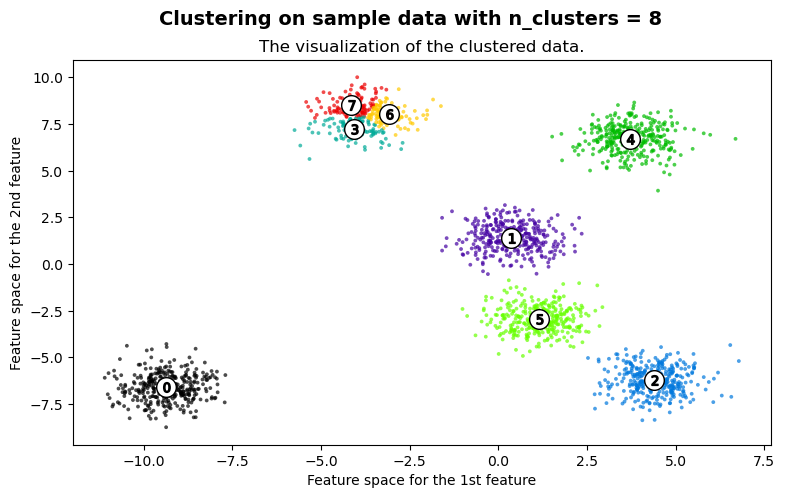

In [17]:
sc = []
WCSS = []
k = [2, 3, 4, 5, 6, 7, 8]
for j in k:
    kmModel = KMeans(n_clusters=j,n_init='auto')
    kmModel_labels = kmModel.fit_predict(X)
    WCSS.append(kmModel.inertia_)
    sc.append(silhouette_score(X,kmModel_labels))
        # 2nd Plot showing the actual clusters formed
    fig, (ax2) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)
    colors = cm.nipy_spectral(kmModel_labels.astype(float) / j)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = kmModel.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Clustering on sample data with n_clusters = %d"
        % j,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Text(0, 0.5, 'Within-cluster sum of squares (WCSS)')

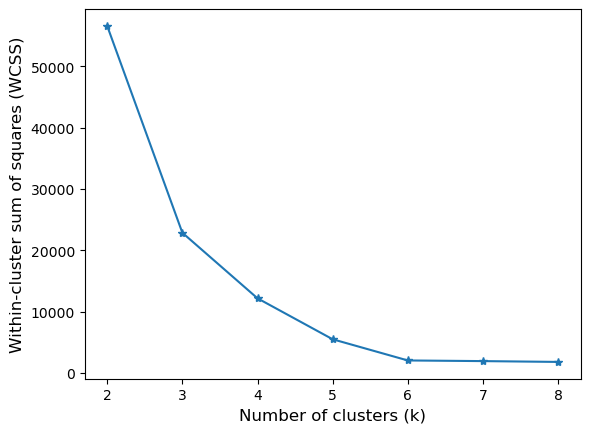

In [14]:
# Plot the WCSS for each k
ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Within-cluster sum of squares (WCSS)', fontsize=12)

Text(0, 0.5, 'Silhouette Score')

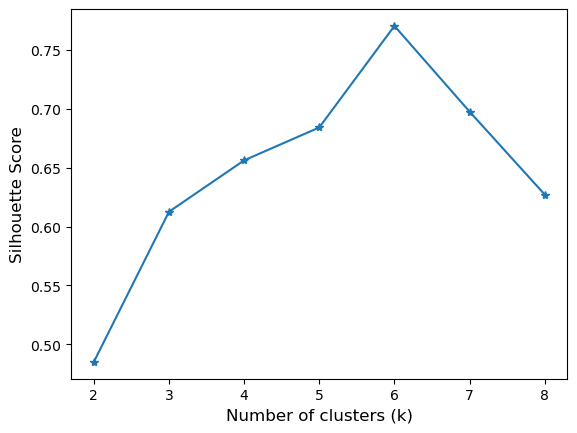

In [15]:
# Plot the Silhouette score for each k
#it is indeed 6 the optimal cluster number
ax = plt.figure().gca()
plt.plot(k, sc, '*-')
plt.xlabel('Number of clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)